In [2]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
import skimage.transform
from scipy.ndimage import map_coordinates
import scipy
import scipy.ndimage
from scipy.stats import nakagami
from skimage.measure import label, regionprops
from skimage.morphology import convex_hull_image
from skimage.draw import polygon

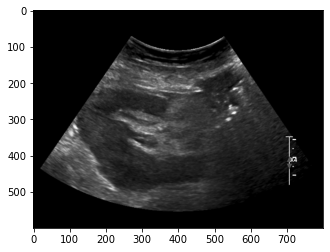

In [3]:
img = cv2.imread("14_IM-0001-0181_frame0_anon.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

In [4]:
def get_scanlines(img):
    """
    Find outer scanlines of ultrasound image. This function 
    will likely require background except for ROI to be masked out. 
    Can be adapted if needed for other datasets. 

    :param img: ultrasound image
    :return: parameters defining scanlines to use to generate mask
    """
    left_line = []
    right_line = []

    start_row = 0
    h, w = img.shape
    min_col = w
    
    # Trace scanlines
    for i in range(h):
        row = img[i, :]
        if(np.count_nonzero(row)) > 1:
            nonzero = row.nonzero()
            if start_row==0:
                start_row = i
            if nonzero[0][0] < min_col:
                min_col = nonzero[0][0]
            if nonzero[0][0] > min_col + 5:
                break
            left_line.append(nonzero[0][0])
            right_line.append(nonzero[0][-1])
            
    # Find lines of best fit to scanlines
    y = np.arange(start_row, start_row+len(left_line))
    left = np.polyfit(np.array(left_line),y,1)
    right = np.polyfit(np.array(right_line),y,1)
    xi = (left[1]-right[1])/(right[0]-left[0])
    yi = left[0] * xi + left[1]
    slopes = (left, right)
    if yi > 0:
        yi = 0

    radius = img.shape[0] - yi
    center = left_line[0] + (right_line[0] - left_line[0])/2

    return center, radius, -yi, slopes

In [25]:
def apply_tgc(img, center, regions=2):
    centerline = img[:, int(center)]
    nz_indices = np.nonzero(centerline)
    image_radius = nz_indices[-1] - nz_indices[0]
    region_size = int(image_radius / regions)
    print(nz_indices)

    return img

In [23]:
def tgc_augmentation(img, regions=2):
    center, radius, buffer, slopes = get_scanlines(img)
    print(img.shape)
    img = apply_tgc(img, center, regions=regions)

In [26]:
masked_image = tgc_augmentation(img)
# plt.imshow(masked_image, cmap='gray')

(600, 800)
(array([108, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123,
       126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
       197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209,
       210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
       223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
       236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248,
       249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
       262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274,
       275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287,
       288, 289, 290, 291, 292, 293, 294, 295, 296, 